> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Medical Appointment No Shows )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **questions**:
1. Does gender have an effect on show or noshw?
2. Does age have an effect on show or noshw?
3. Does chronic diseases have an effect on show or noshow?
4. Does receiving SMS have an effect on show or noshow?
5. Does Neighbourhood have an effect on show and noshow ?

* This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* -Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

In [201]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [202]:
# Load data and get some lines
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


* if 'no_show' == no >> already came ,,, yes >> didn't come  

### exploring data 

In [203]:
# exploring the shape of data
df.shape

(110527, 14)

* there is 110521 rows and 14 clumns in the data

In [204]:
# get some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* the data have no nan values

In [205]:
# get some statistic information 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* the min of 'age' is -1 

In [206]:
# get some statistic information about age
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [207]:
# check the data with age = -1 and how many
df[df['Age'] <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


* only one row -1 so i can drop the row 

In [208]:
# Checking for duplicate rows
df.duplicated().sum()

0

* the is no duplicated rows wit all featchers

In [209]:
# Checking for duplicate patients
df.PatientId.duplicated().sum()

48228

* there is 48228 patients have the same ID

In [210]:
# checking for duplicated appointmments for the same patient  
df.duplicated(['PatientId', 'AppointmentDay']).sum()

8719

* there is 8719 patients have the same status of show or noshow .. so i will remove them

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning ()
1. remove the duplicate values of patientsID wit same status
2. remove the row of 'age' == -1 
3. rename columns with a standard style
4. removing unnnecessary columns for my questions
 


In [211]:
#drop data with age = -1
df.drop(df[df.Age < 0].index, inplace=True)

In [212]:
# test 
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [213]:
# remove duplicated values in PatientId and No-show . both are duplicated = drop
df.drop_duplicates( ['PatientId','No-show']  ,inplace=True)

In [214]:
# test
df.shape

(71816, 14)

In [215]:
# removing unnnecessary columns 
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [216]:
# test
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [217]:
# rename cloumns with a standard style
df.rename(columns={'No-show':'No_show'} ,inplace=True )

In [218]:
# test
df.sample(10)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
81716,F,56,ITARARÉ,0,0,0,0,0,0,No
21834,M,48,SANTA CLARA,0,0,0,1,0,0,Yes
30435,F,27,CENTRO,0,0,0,0,0,0,Yes
105661,M,38,SANTA MARTHA,0,0,0,0,0,1,No
82934,F,30,ITARARÉ,0,0,0,0,0,1,No
21311,F,83,SANTO ANDRÉ,0,1,1,0,0,0,No
82439,F,43,ITARARÉ,0,1,0,0,0,0,No
65269,M,2,JARDIM CAMBURI,0,0,0,0,0,0,Yes
18429,F,49,MARIA ORTIZ,0,0,0,0,0,0,No
90500,F,24,CENTRO,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research first  ( What are the important characteristics with show up  ? )

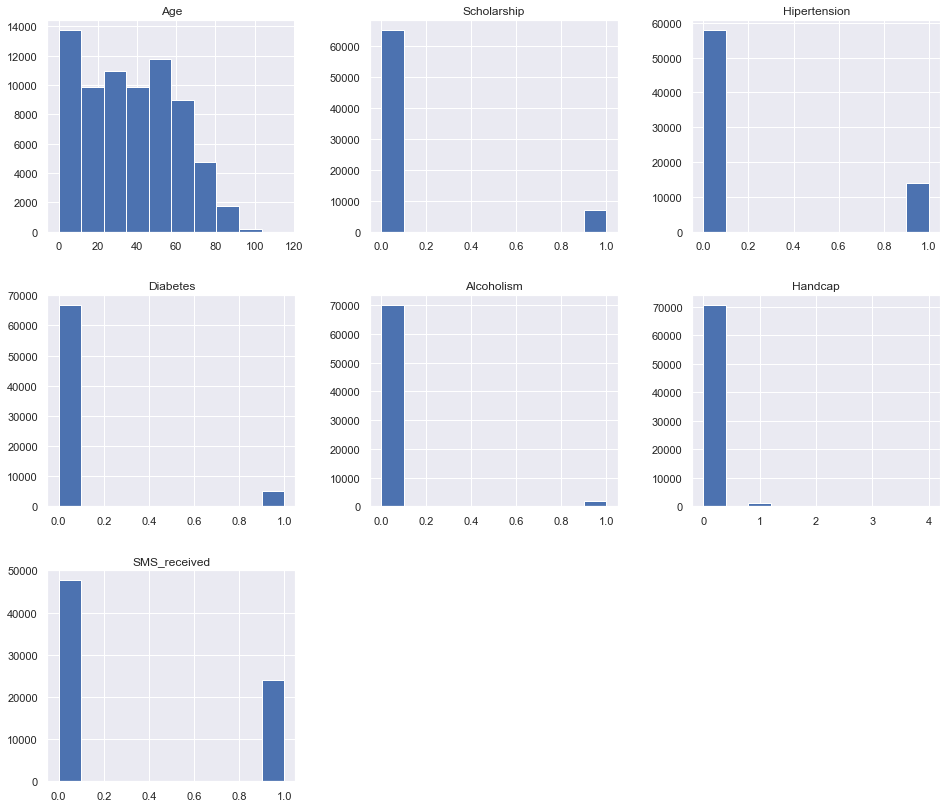

In [219]:
# explore the data
df.hist(figsize=(16,14));

* Very few alcoholics
* Almost half of the patients received sms
* Very few in handcap
* patients who have hypertenstoin more that who have diabets

In [220]:
# spilt the data to show and noshow  // show who came and noshow who did'nt come
show = df[df['No_show'] == 'No']
noshow = df[df['No_show'] == 'Yes']


In [221]:
show.shape

(54153, 10)

In [222]:
noshow.shape

(17663, 10)

In [223]:
show.count() , noshow.count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hipertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hipertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

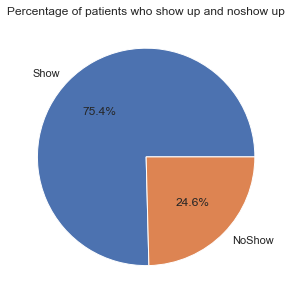

In [224]:
# Exploring Percentage of patients who showed up
show_up_percent = (show.shape[0]/df.shape[0])*100
not_show_up_percent = (noshow.shape[0]/df.shape[0])*100
plt.figure(figsize=(5,5))
plt.pie(x=[show_up_percent, not_show_up_percent], labels=['Show', 'NoShow'], autopct='%1.1f%%')
plt.title('Percentage of patients who show up and noshow up')
plt.show()

### Research Question 1 (Does gender have an effect on show or noshw? )

In [225]:
# I will create a function to plot the gender couse gender 'F' 'M'
def plot_gender(col, labels):
    plt.figure(figsize=(8,6))
    plt.bar([labels[0], labels[1]], [show[show[col] == 'F'][col].count(), show[show[col] =='M'][col].count()], label='Showed')
    plt.bar([labels[0], labels[1]], [noshow[noshow[col] == 'F'][col].count(), noshow[noshow[col] == 'M'][col].count()], label='Did not show up')
    plt.title("Distribution of "+ col +" who likely to show vs not to show")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [226]:
# I will create a function to plot each column copar show vs noshow 
def plot(col, labels):
    plt.figure(figsize=(8,6))
    plt.bar([labels[0], labels[1]], [show[show[col] == 0][col].count(), show[show[col] ==1][col].count()], label='Showed')
    plt.bar([labels[0], labels[1]], [noshow[noshow[col] == 0][col].count(), noshow[noshow[col] == 1][col].count()], label='Did not show up')
    plt.title("Distribution of "+ col +" who likely to show vs not to show")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

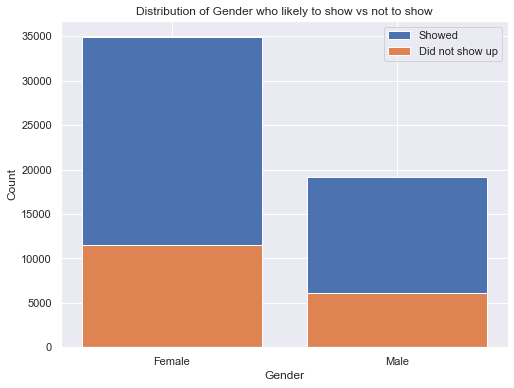

In [227]:
# Exploring the effect of Gender feature on showing up

plot_gender('Gender', ['Female', 'Male'])

The number of females is greater than the number of males 

In [228]:
genders_shown_up = df.groupby(['Gender', 'No_show'])['Age'].count()
genders_shown_up

Gender  No_show
F       No         34960
        Yes        11506
M       No         19193
        Yes         6157
Name: Age, dtype: int64

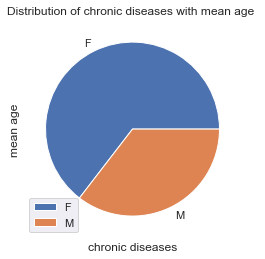

In [229]:
plt.figure(figsize=(16,4))
show['Gender'].value_counts(normalize=True).plot(kind='pie', label='show' )

plt.title('Distribution of chronic diseases with mean age ')
plt.xlabel('chronic diseases')
plt.ylabel('mean age')
plt.legend()
plt.show()


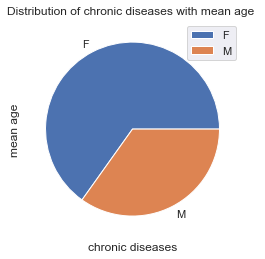

In [230]:
plt.figure(figsize=(16,4))
noshow['Gender'].value_counts(normalize=True).plot(kind='pie', label='show' )

plt.title('Distribution of chronic diseases with mean age ')
plt.xlabel('chronic diseases')
plt.ylabel('mean age')
plt.legend()
plt.show()

* From the figures above we can conclude that both genders are committed almost the same 


### Research Question 2  (Does age have an effect on show or noshw? )

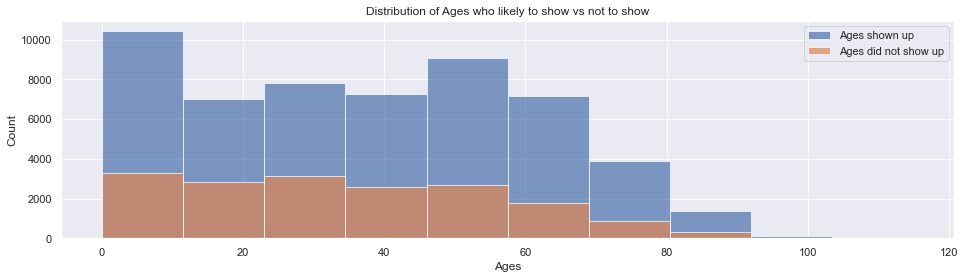

In [231]:
# Exploring the distribution of the ages show and noshow

plt.figure(figsize=(16,4))
plt.hist(show['Age'], label='Ages shown up', alpha=0.7)
plt.hist(noshow['Age'], label='Ages did not show up', alpha=0.7)
plt.title('Distribution of Ages who likely to show vs not to show')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend()
plt.show()

* From the figure above we can canclude that most of the ages that show are below 10 years old or from 50 to 60 years

### Research Question 3  (Does chronic diseases have an effect on attendance or absence?)

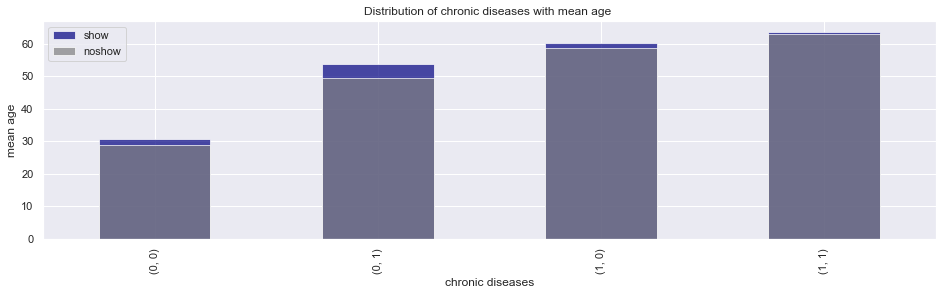

In [232]:
plt.figure(figsize=(16,4))
show.groupby(['Hipertension','Diabetes']).mean()['Age'].plot(kind='bar', label='show', color='navy' ,alpha=0.7 )
noshow.groupby(['Hipertension','Diabetes']).mean()['Age'].plot(kind='bar', label='noshow', color='gray',alpha=0.7)
plt.title('Distribution of chronic diseases with mean age ')
plt.xlabel('chronic diseases')
plt.ylabel('mean age')
plt.legend()
plt.show()

* From the figure above we can canclude that chronic diseases almost have no effect in show or noshw 

### Research Question 4 (Does receiving SMS have an effect on show or noshow?)

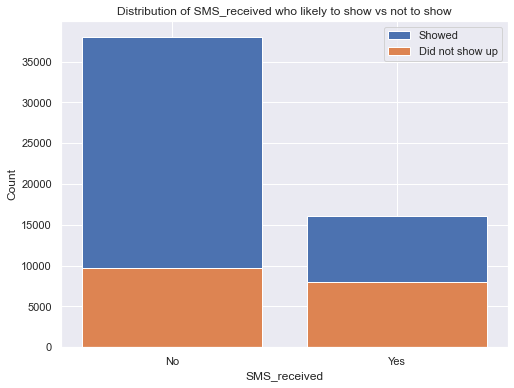

In [233]:
# Exploring the effect of SMS_received feature on showing up
plot('SMS_received', ['No', 'Yes'])

* the patients who didn't receieve an sms reminder before the appoitment are more showed than patients who received sms .

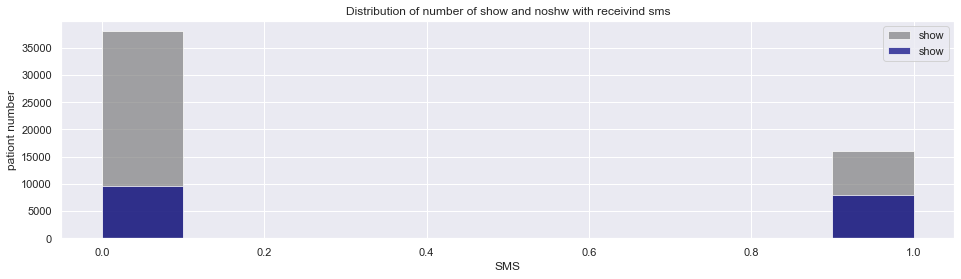

In [234]:
# Distribution of number of show and noshw with receivind sms
plt.figure(figsize=(16,4))
show['SMS_received'].hist( color='gray' ,alpha=0.7  , label='show' )
noshow['SMS_received'].hist( color='navy' ,alpha=0.7  , label='show' )


plt.title('Distribution of number of show and noshw with receivind sms')
plt.xlabel('SMS')
plt.ylabel('pationt number')
plt.legend()
plt.show()

* 

### Research Question 5 (Does Neighbourhood have an effect on show and noshow)

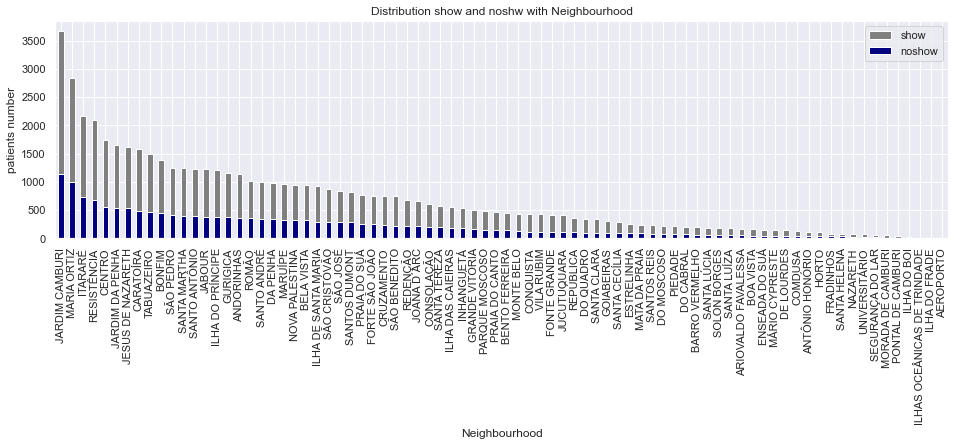

In [235]:
plt.figure(figsize=(16,4))
show['Neighbourhood'].value_counts().plot(kind='bar',color='gray' ,label='show' )
noshow['Neighbourhood'].value_counts().plot(kind='bar',color='navy' ,label='noshow' )


plt.title('Distribution show and noshw with Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('patients number')
plt.legend()
plt.show()

In [236]:
show['Neighbourhood'].value_counts()

JARDIM CAMBURI       3666
MARIA ORTIZ          2845
JARDIM DA PENHA      2160
RESISTÊNCIA          2098
ITARARÉ              1745
                     ... 
PONTAL DE CAMBURI      38
ILHA DO BOI            21
AEROPORTO               6
ILHA DO FRADE           4
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

In [237]:
noshow['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1134
MARIA ORTIZ                    1000
ITARARÉ                         725
RESISTÊNCIA                     682
CENTRO                          555
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

* There is a big difference between each neighborhood in attendance and number

<a id='conclusions'></a>
## Conclusions

* The number of females is higher than males in this dataset, After splitting the gender into 2 groups to know who are more show inside each group. We can conclude that both genders are show with the same percentage almost.
* Most of the ages that go to doctors are below 10 years old or from 50 to 60 years, we can conclude that age is an important feature in the analysis
* The percentage of patients who have alcoholismin in their blood is too small.
* Neighborhood has an effect with show patience ,and JARDIM CAMBURI has the The largest number of patients and attendance also

> **Limitations**:
* can't fined conclusion btween patients show and noshow and Hipertension ,Diabetes ,Alcoholism ,Handcap
